# Un juego tiene exito o no?
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicializacion

In [3]:
#Llamar a librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
from scipy import stats

## Cargar Datos

In [5]:
#Cargar a los archivos
games=pd.read_csv('games.csv')

In [6]:
#Mostrar informacion 
def info_data(datos):
    print('Primeras Filas')
    print(datos.head())
    print('Informacion General')
    print(datos.info())
    print('Datos nulos')
    print(datos.isna().sum())
    print('Datos Duplicados')
    print(datos.duplicated().sum())

In [7]:
info_data(games)

Primeras Filas
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries,

In [8]:
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


## Preparar los datos
1.-Remplazar los nombres de la columnas en minusculas
2.-Hay Valores nulos en la Columna Name es decir que nose sabe el nombre del juego pero como es un valor categorico y no numerico no habria porque remplazarlo con algun valor. 
3.-En la Columna de Año de Lanzamiento si hay que cambiar el tipo de dato a tipo de dato fecha y los valores nulos habria que colocar una fecha inxistente.
4.-Hay valores nulos en la columna Puntuacion de Usuarios que como tipo de objeto y no numerico por lo cual hya valores determinados como tbt colocarles como valores ausentes para luego rellenarles con la mediana ya que es mas del 50 porciento de valores nulos. 
5.-La Columna Puntaje de Critico 
6.-Hay valores nulos de Rating que estan evaluadas con un valor categorico se les deberia dejar con NaN o remplazar con un valor de Sin CLasificacion

In [10]:
# Remplazar los nombres de las columnas en minusculas
games.columns = games.columns.str.lower()

In [11]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
#Rellena los valores nulos de la Columna name
games['name']= games['name'].fillna("Desconocido")

In [13]:
#Rellenar los valores nulos de la Comluna year_of_release
games['year_of_release'] = games['year_of_release'].fillna(0).astype('int')

In [14]:
#Rellenar los valores nulos de la Columna genre 
games['genre']= games['genre'].fillna("Desconocido")

In [15]:
#Rellanar los valos tbt (por determinar como nulos y cambiar a tipo de dato flotante
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [16]:
games.stb.missing(style=True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [17]:
games['user_score'] = games['user_score'].fillna(-1)

In [18]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [19]:
#Rellenar la columna de Rating 
games['rating'] = games['rating'].fillna('Desconocido')

In [20]:
games.stb.missing(style=True)

,missing,total,percent
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%
critic_score,0,"16,715",0.00%
user_score,0,"16,715",0.00%


### Estudio de Ventas Totales
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [22]:
games['ventas_totales']= games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [23]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Desconocido,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Desconocido,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Desconocido,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,Desconocido,0.01


## Analisis de Datos

### Cuantos juegos fueron lanzados en diferentes años?
¿Son significativos los datos de cada período?

In [26]:
games_for_year= games.groupby('year_of_release').count()['name'].sort_values().reset_index()

In [27]:
games_for_year= games_for_year.query('year_of_release != 0')
games_for_year.columns = ['year_of_release','total_games']

In [28]:
games_for_year

,year_of_release,total_games
0,1980,9
1,1984,14
2,1985,14
3,1988,15
4,1987,16
5,1990,16
6,1983,17
7,1989,17
8,1986,21
9,1982,36


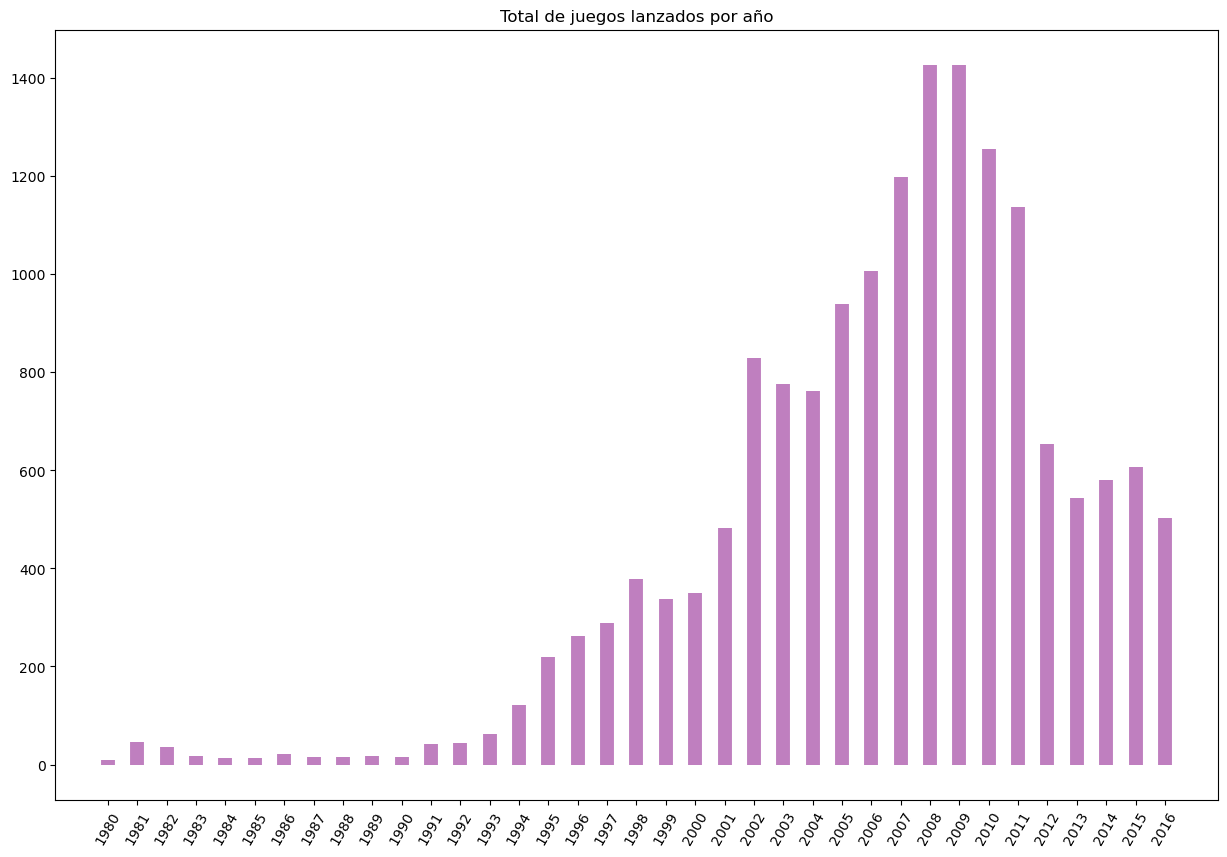

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=games_for_year.year_of_release, ymin=0, ymax=games_for_year.total_games, alpha=0.5, linewidth=10, color='purple')
ax.set_title('Total de juegos lanzados por año')
ax.set_xticks(games_for_year.year_of_release)
ax.set_xticklabels(games_for_year.year_of_release, rotation=60)
plt.show()

#### Conclusion 
Los datos de numero de juegos por años son significstivos porque nos muestrar que hay mas juegos lanzados en los años 2008 y 2009 y que los años posteriores bajan el numero de juegos lanzados hasta el 2016. 

### Cuales son las ventas totales por plataforma?
Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [32]:
platform_sales= games.groupby('platform')['ventas_totales'].sum()
platform_sales= platform_sales.sort_values(ascending = False).reset_index()
platform_sales

,platform,ventas_totales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


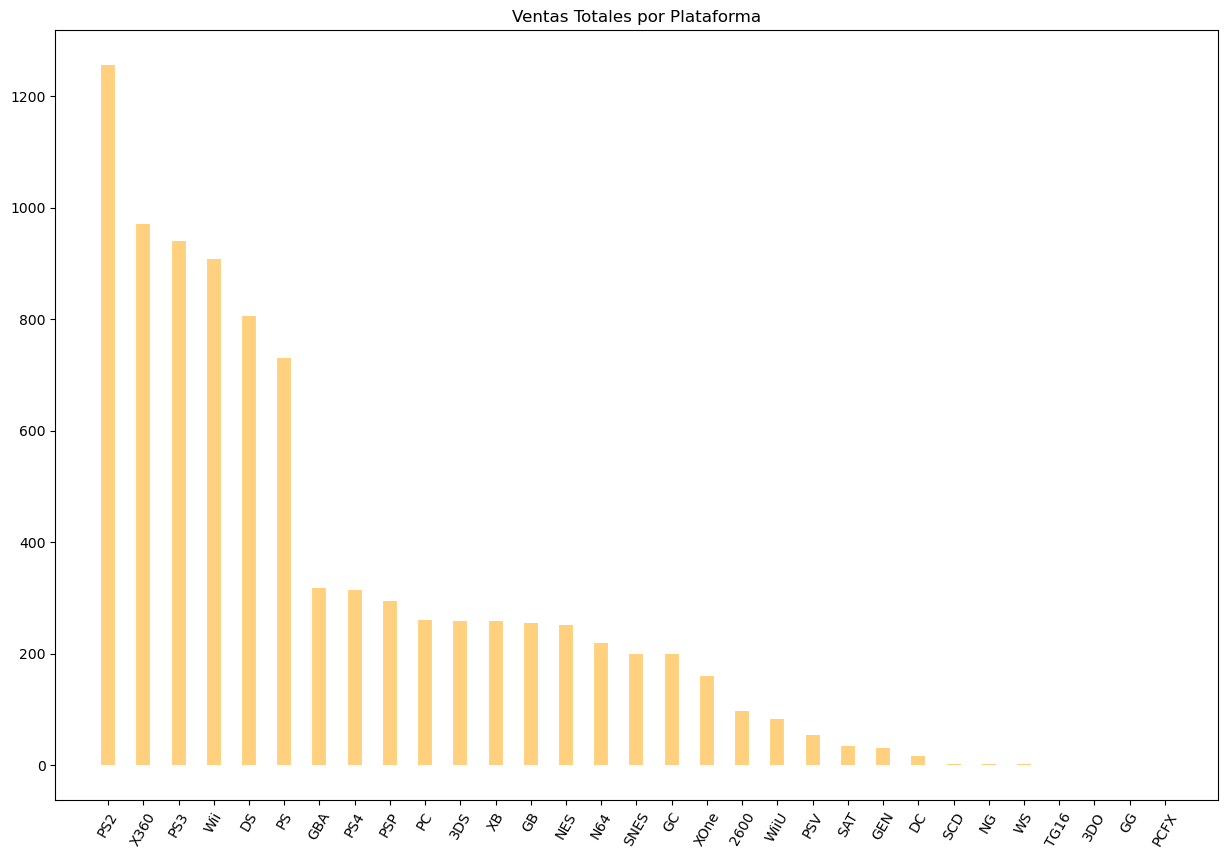

In [33]:
fig, ax= plt.subplots(figsize=(15,10))
ax.vlines(x=platform_sales.platform, ymin=0, ymax=platform_sales.ventas_totales, alpha=0.5, linewidth=10, color='orange')
ax.set_title('Ventas Totales por Plataforma')
ax.set_xticks(platform_sales.platform)
ax.set_xticklabels(platform_sales.platform, rotation=60)
plt.show()

#### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [35]:
platform_sales['z_score']= (platform_sales['ventas_totales'] - platform_sales['ventas_totales'].mean())/platform_sales['ventas_totales'].std()

In [36]:
platform_sales['color']= ['red' if puntaje < 0 else 'green' for puntaje in platform_sales['z_score']]

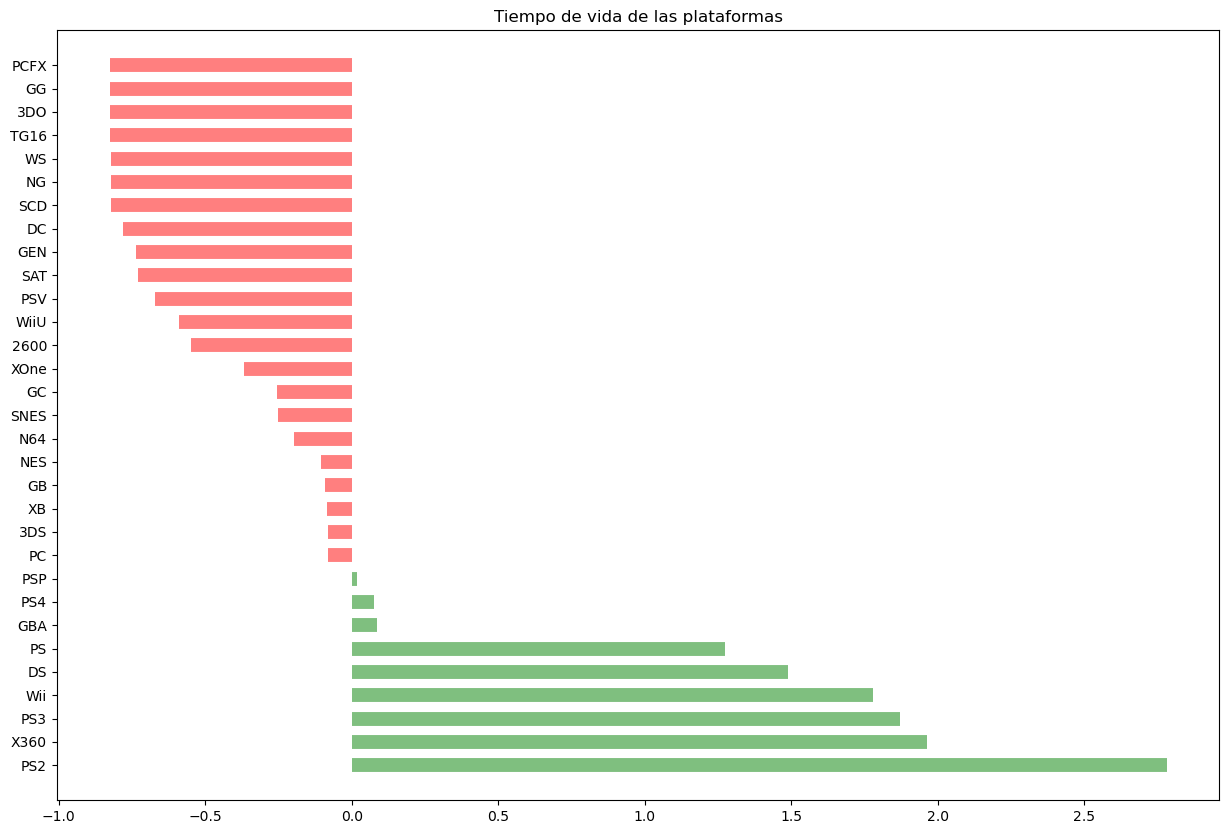

In [37]:
plt.figure(figsize=(15,10))
plt.hlines(
    y=platform_sales.platform, xmax=platform_sales.z_score, xmin=0, linewidth=10,alpha=0.5, color=platform_sales.color
)
plt.title('Tiempo de vida de las plataformas')
plt.show()

### Determinar Periodo para estudiar los datos
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [39]:
games_sales_for_year= games.pivot_table(
    index='year_of_release', columns='platform', values='ventas_totales', aggfunc='sum'
).fillna(0)

In [40]:
games_sales_for_year = games_sales_for_year.iloc[1:, :]

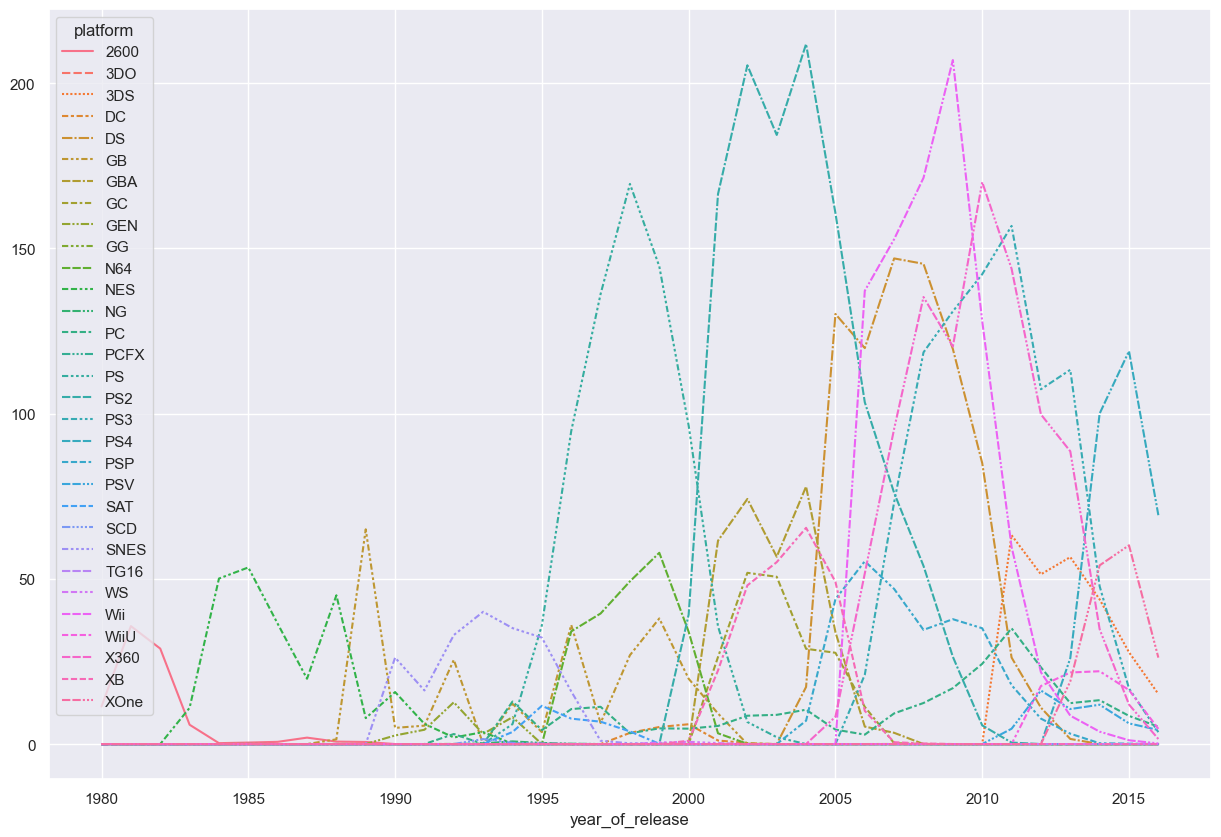

In [41]:
sns.set(rc={'figure.figsize': (15,10)})
sns.lineplot(data=games_sales_for_year)
plt.show()

#### Periodo Seleccionado

In [43]:
cleand_data = games[games.year_of_release >= 2005]

In [44]:
cleand_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,Desconocido,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Desconocido,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Desconocido,0.01


In [45]:
games_sales_for_year= cleand_data.pivot_table(
    index='year_of_release', columns='platform', values='ventas_totales', aggfunc='sum'
).fillna(0)

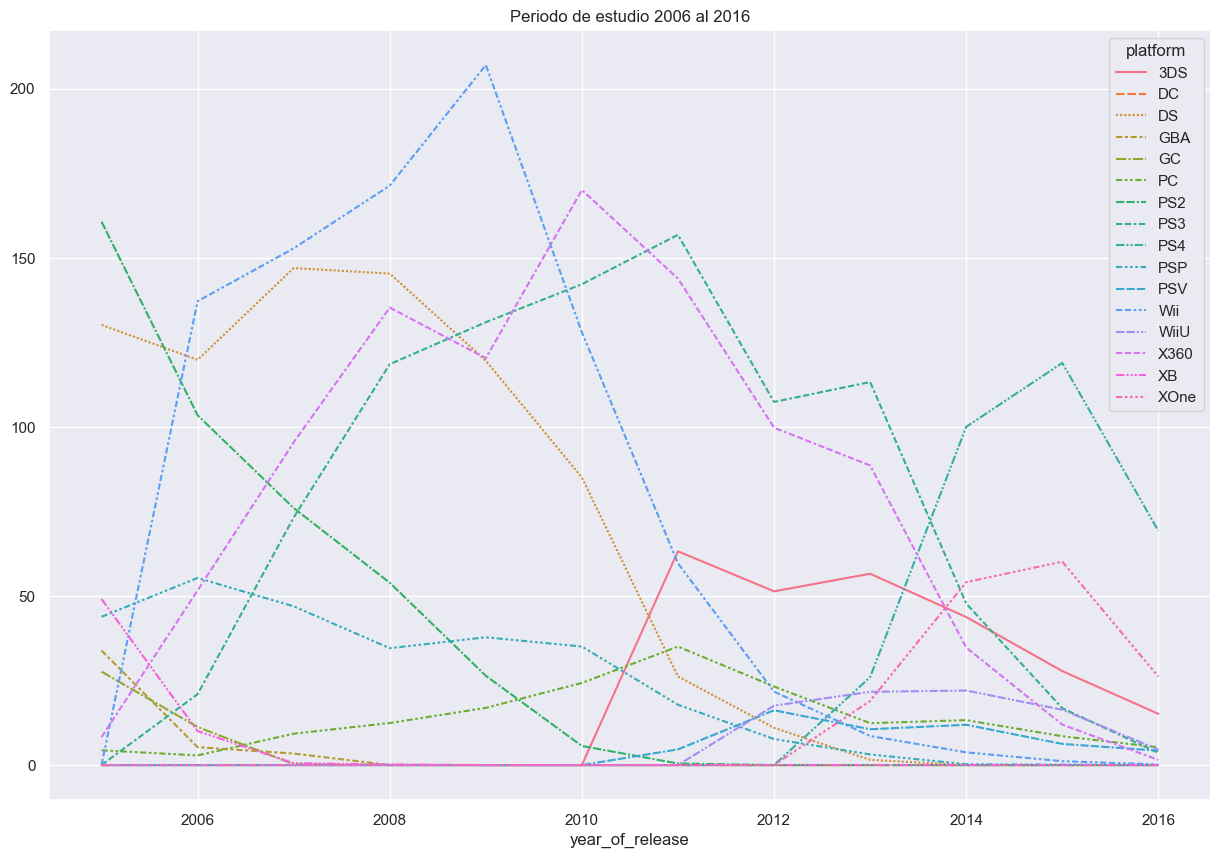

In [256]:
sns.set(rc={'figure.figsize': (15,10)})
plt.title('Periodo de estudio 2006 al 2016')
sns.lineplot(data=games_sales_for_year)
plt.show()

### Que plataformas son lideres en ventas?
¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [48]:
ventas_lideres= cleand_data.groupby('platform').agg({'ventas_totales':'sum'}).reset_index()

In [49]:
ventas_lideres= ventas_lideres.sort_values(by='ventas_totales',ascending=False)

In [50]:
ventas_lideres

,platform,ventas_totales
13,X360,961.24
7,PS3,931.34
11,Wii,891.18
2,DS,785.49
6,PS2,426.46
8,PS4,314.14
9,PSP,282.47
0,3DS,257.81
5,PC,167.79
15,XOne,159.32


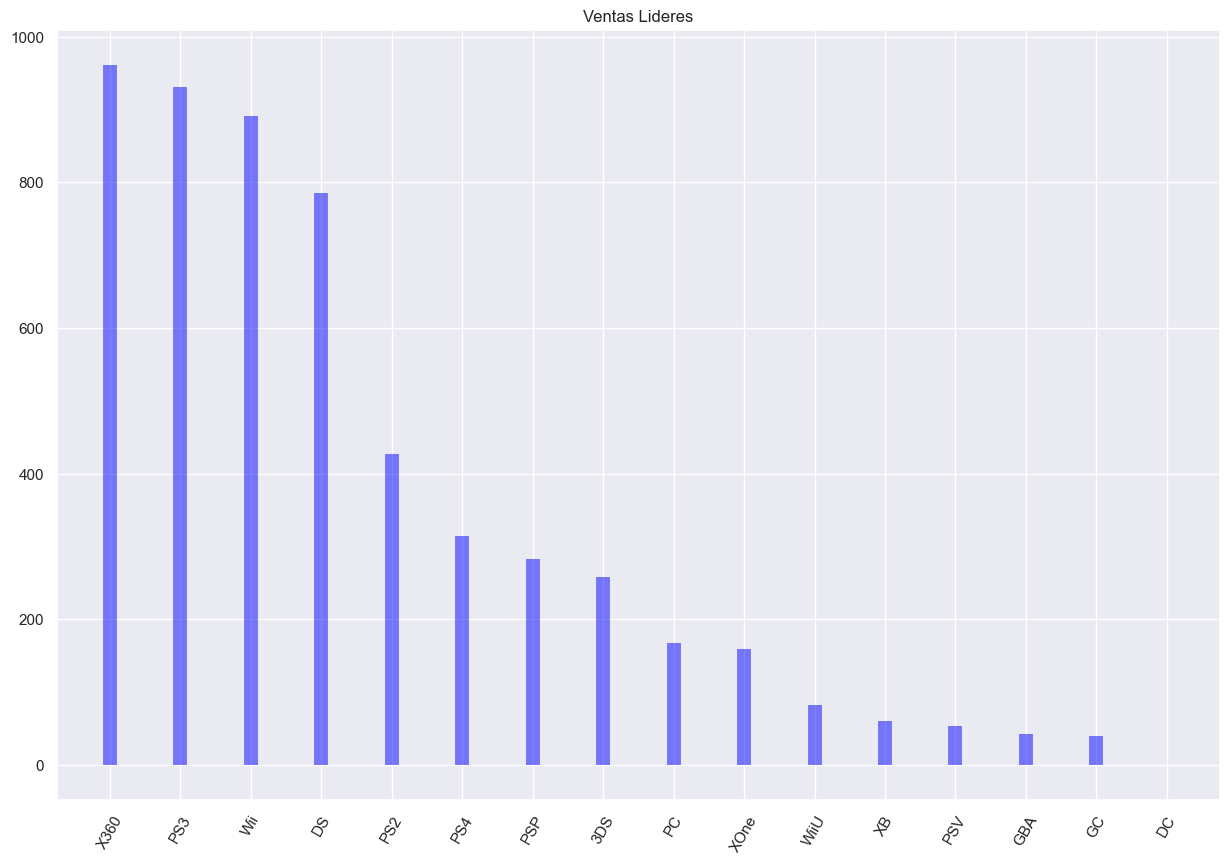

In [51]:
fig, ax= plt.subplots(figsize=(15,10))
ax.vlines(x=ventas_lideres.platform, ymin=0, ymax=ventas_lideres.ventas_totales, alpha=0.5, linewidth=10, color='blue')
ax.set_title('Ventas Lideres')
ax.set_xticks(ventas_lideres.platform)
ax.set_xticklabels(ventas_lideres.platform, rotation=60)
plt.show()

#### Conclusion
Las plataformas X360, PS3, WII Y Nintendo DS son mas rentables segun el estudio realizado tomando datos del 2006 al 2016 por su volumen de ventas es superior al resto de juegos. 

### ¿Son significativas las diferencias en las ventas?
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [54]:
ventas_lideres_total= ventas_lideres['ventas_totales'] / ventas_lideres['ventas_totales'].sum()
ventas_lideres_total

13    0.176218
7     0.170736
11    0.163374
2     0.143999
6     0.078180
8     0.057589
9     0.051783
0     0.047263
5     0.030760
15    0.029207
12    0.015067
14    0.010972
10    0.009865
3     0.007799
4     0.007177
1     0.000011
Name: ventas_totales, dtype: float64

In [55]:
total_de_ventas= ventas_lideres['ventas_totales'].sum()
total_de_ventas

5454.84

In [56]:
ventas_lideres['Promedio_ventas_por_plataforma']=ventas_lideres['ventas_totales'] / ventas_lideres['ventas_totales'].sum()
ventas_lideres

,platform,ventas_totales,Promedio_ventas_por_plataforma
13,X360,961.24,0.176218
7,PS3,931.34,0.170736
11,Wii,891.18,0.163374
2,DS,785.49,0.143999
6,PS2,426.46,0.078180
8,PS4,314.14,0.057589
9,PSP,282.47,0.051783
0,3DS,257.81,0.047263
5,PC,167.79,0.030760
15,XOne,159.32,0.029207


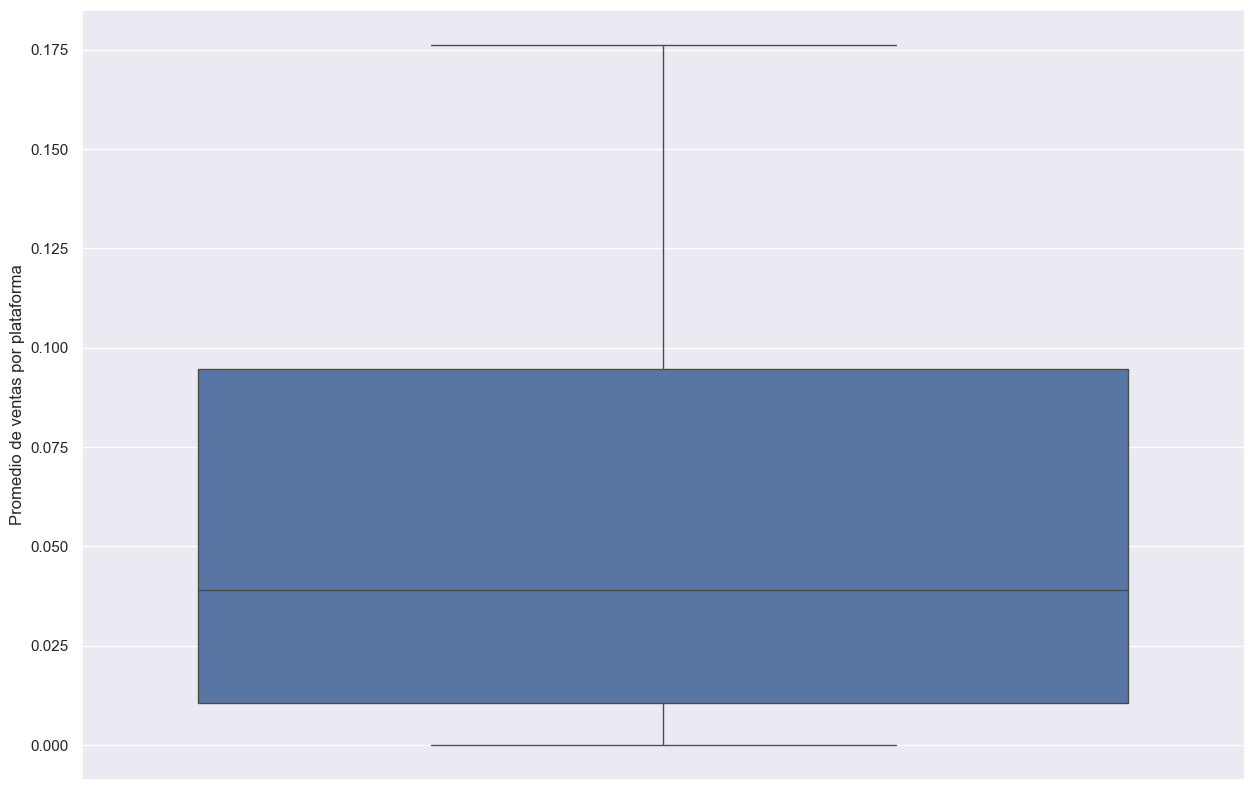

In [57]:
ax =sns.boxplot(ventas_lideres_total)
ax.set(ylabel='Promedio de ventas por plataforma')
plt.show()

#### Conclusion
La mediana esta muy por debajo del total de promedio de ventas por cada plataforma es decir que hay un sesgo negativo, es decir hay mas plataformas que el periodo del 2006 al 2016 que se estan vendiendo menos que las otras plataformas que se venden mas que son muy pocas. 

### Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?
Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [60]:
#Seleccionar la plataforma mas popular segun mi criterio 
scores= cleand_data.query('critic_score > 0 & (platform == "X360")')
scores= scores[['platform','critic_score','user_score']]
scores

,platform,critic_score,user_score
14,X360,61.0,6.3
23,X360,97.0,8.1
29,X360,88.0,3.4
32,X360,87.0,6.3
35,X360,83.0,4.8
...,...,...,...
15743,X360,75.0,6.9
16311,X360,77.0,8.2
16474,X360,57.0,-1.0
16550,X360,62.0,-1.0


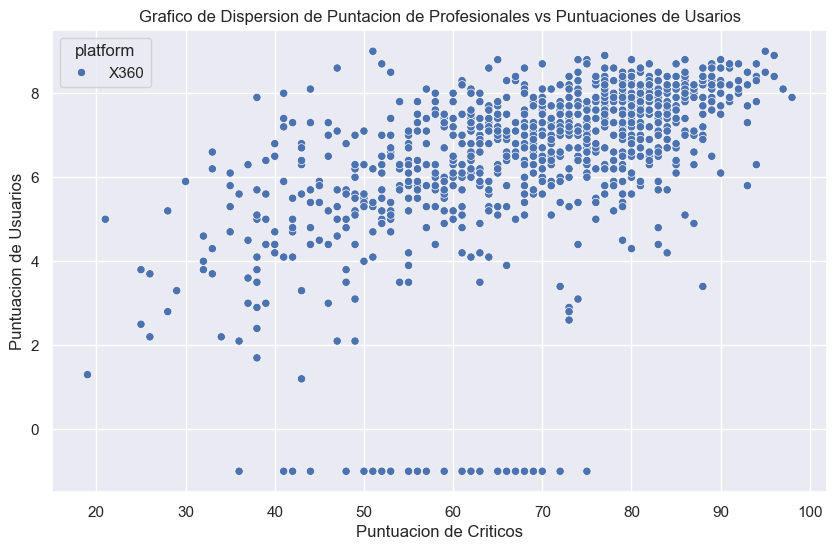

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=scores, x='critic_score', y='user_score', hue='platform')
plt.title('Grafico de Dispersion de Puntacion de Profesionales vs Puntuaciones de Usarios')
plt.xlabel('Puntuacion de Criticos')
plt.ylabel('Puntuacion de Usuarios')
plt.show()

#### Conclusion
A medida que la Puntuacion de los Criticos amuenta la de los Usuarios igual asi que es correlacion positiva en el caso del jugo mas popular como es el X360.

###  ¿Qué se puede decir de los géneros más rentables? 
Echa un vistazo a la distribución general de los juegos por género. ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [64]:
generos_por_juego= cleand_data[['platform','genre']]

In [65]:
generos_por_juego

,platform,genre
0,Wii,Sports
2,Wii,Racing
3,Wii,Sports
6,DS,Platform
7,Wii,Misc
...,...,...
16709,PS2,Racing
16710,PS3,Action
16711,X360,Sports
16712,PSV,Adventure


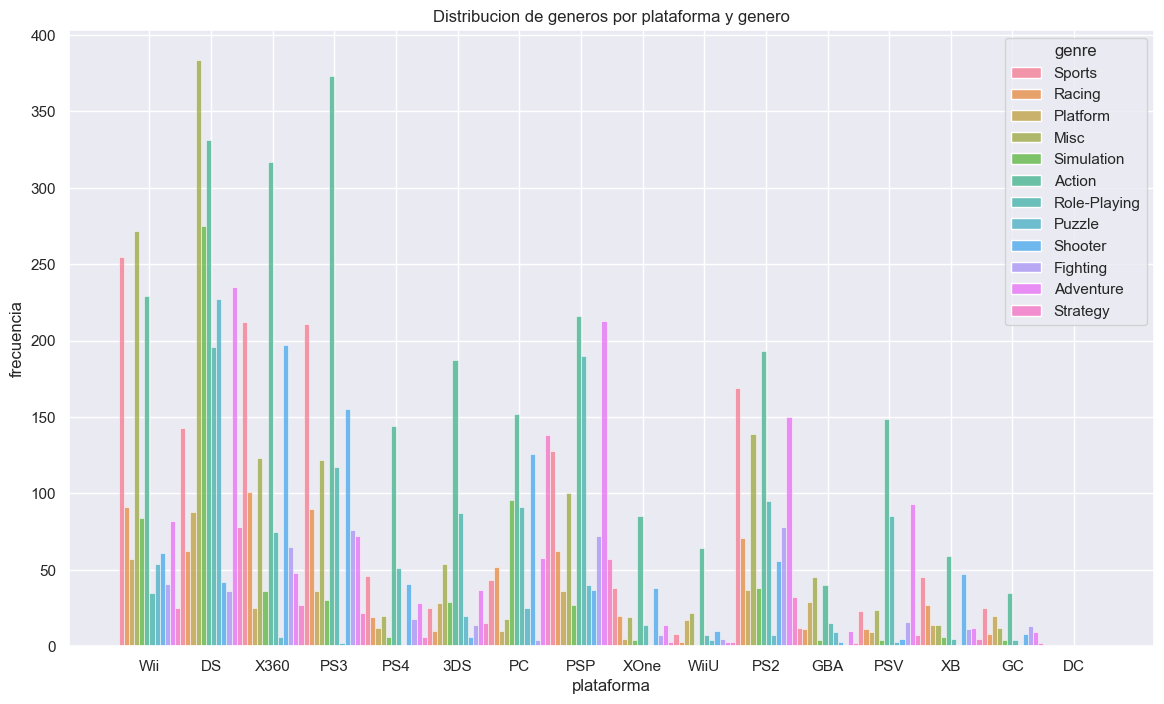

In [66]:
plt.figure(figsize=(14,8))
sns.histplot(generos_por_juego, x='platform', hue='genre', multiple='dodge', alpha=0.7)
plt.title('Distribucion de generos por plataforma y genero')
plt.ylabel('frecuencia')
plt.xlabel('plataforma')
plt.show()

#### Conclusion
Se podria generalizar que el genero Accion es el mas frecuente su venta en cada plataformay el genero Simulacion es el que su venta es menos frecuente en cada plataforma. 

## Perfil de Usuario por cada region.
Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principal.es.

In [261]:
plataformas_lideres= cleand_data.groupby('platform').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','ventas_totales':'sum'})
plataformas_lideres= plataformas_lideres.sort_values(by='ventas_totales',ascending=False)
plataformas_lideres= plataformas_lideres.reset_index()
plataformas_lideres= plataformas_lideres.loc[:4]
plataformas_lideres

,platform,na_sales,eu_sales,jp_sales,ventas_totales
0,X360,595.74,268.32,12.30,961.24
1,PS3,390.13,327.21,79.41,931.34
2,Wii,486.87,258.32,68.28,891.18
3,DS,371.98,184.48,171.35,785.49
4,PS2,200.49,87.14,50.98,426.46


In [263]:
generos_lideres= cleand_data.groupby('genre').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','ventas_totales':'sum'})
generos_lideres= generos_lideres.sort_values(by='ventas_totales',ascending=False)
generos_lideres= generos_lideres.reset_index()
generos_lideres= generos_lideres.loc[:4]
generos_lideres

,genre,na_sales,eu_sales,jp_sales,ventas_totales
0,Action,580.04,372.58,108.39,1202.04
1,Sports,432.70,265.61,52.51,853.34
2,Shooter,400.96,248.07,20.67,758.56
3,Misc,311.82,167.09,72.49,615.83
4,Role-Playing,211.85,115.52,179.60,550.78


## Prueba de hipotesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [240]:
hyp_data= cleand_data.query('platform == "XOne" or platform == "PC"')

In [2]:
hyp_data

NameError: name 'hyp_data' is not defined

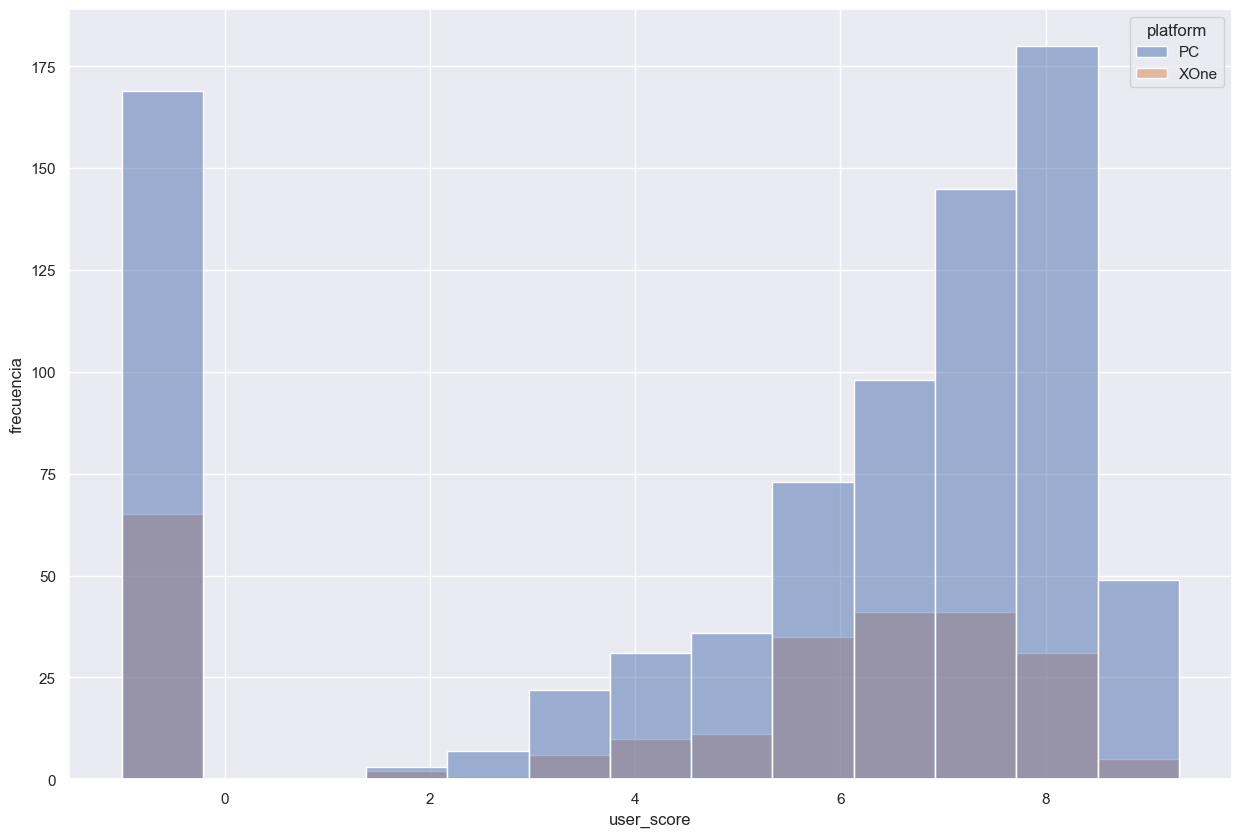

In [242]:
sns.histplot(hyp_data, x='user_score', hue='platform')
plt.ylabel('frecuencia')
plt.xlabel('user_score')
plt.show()

In [244]:
#Comprobar los promedios de los puntajes de los usuarios
hyp_data.groupby('platform')['user_score'].mean()

platform
PC      5.245879
XOne    4.542105
Name: user_score, dtype: float64

In [246]:
# Prueba las hipótesis
#Hipotesis Alternativa: Las diferencias entre el promedio de los usuarios de XOne y PC son estadisticamente significativas, es decir son iguales.
#Hipotesis Nula: Las diferencias entre el promedio de los usuarios de XOne y PC NO son estadisticamente significativas, es decir son diferentes. 
#Crear variables por plataformas
Xone = hyp_data.query('platform == "XOne"')
PC = hyp_data.query('platform == "PC"')
#Definimos el valor alfa y el nivel de confianza
nivel_de_confianza= 0.95
alpha= 1 - nivel_de_confianza
#Comprobamos la varianza de ambas plataformas por medio de una prueba de hipotesis
#Hipotesis Nula:
#Hipotesis Alternativa:
#Establecemos la hipotesis con una prueba estadistica de levene
p_value_levene = stats.levene(
    Xone['user_score'], PC['user_score']
).pvalue

if p_value_levene < alpha:
    print('No se rechaza la H0: la varianza de XOne no es igual a la varianza de PC')
else:
    print('Se puede rechazar la H0: No hay evidencia suficiente para decir que las varianzas de XOne y PC no son iguales')    

Se puede rechazar la H0: No hay evidencia suficiente para decir que las varianzas de XOne y PC no son iguales


In [248]:
p_value_levene

0.5075158564228659

In [250]:
#Prueba de hipotesis
#Hipotesis Alternativa: Las diferencias entre el promedio de los usuarios de XOne y PC son estadisticamente significativas, es decir son iguales.
#Hipotesis Nula: Las diferencias entre el promedio de los usuarios de XOne y PC NO son estadisticamente significativas, es decir son diferentes. 
#Crear variables por plataformas
Xone = hyp_data.query('platform == "XOne"')
PC = hyp_data.query('platform == "PC"')
#Definimos el valor alfa y el nivel de confianza
nivel_de_confianza= 0.95
alpha= 1 - nivel_de_confianza
#Establecemos la hipotesis con una prueba estadistica de ttest
p_value = stats.ttest_ind(
    Xone['user_score'], PC['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value < alpha:
    print("Las diferencias entre el promedio de los usuarios de XOne y PC son estadisticamente significativas")
else:
    print("Las diferencias entre el promedio de los usuarios de XOne y PC NO son estadisticamente significativas.")

Las diferencias entre el promedio de los usuarios de XOne y PC son estadisticamente significativas


In [78]:
p_value

0.002348015535956376

### Conclusion
El promedio de las calificaciones de los usuarios de las plataformas de XOne y PC son estadisticamente significativos es decir que son iguales, esto se lo comprueba con una prueba de varianza que afirma con un cincuenta porciento de probabilidad.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [224]:
hyp_data_genre= cleand_data.query('genre == "Sports" or genre == "Action"')

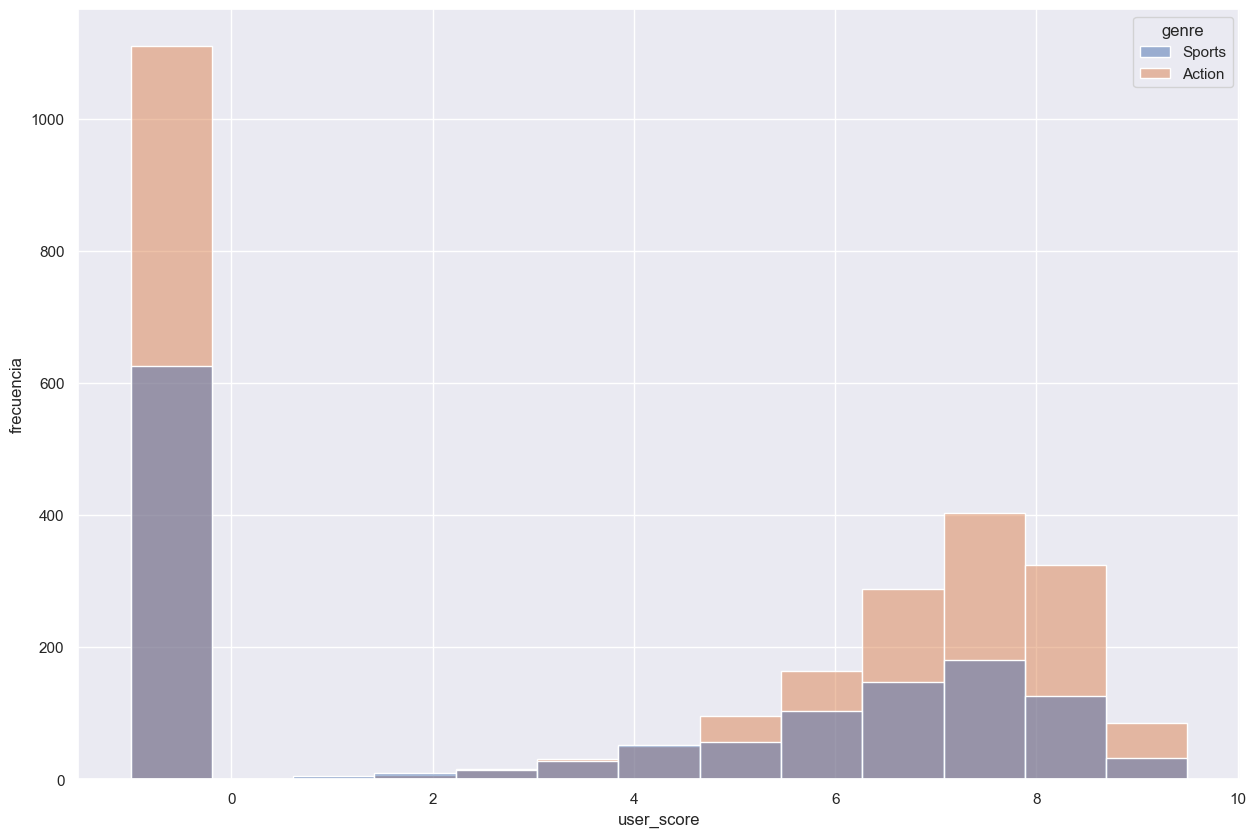

In [226]:
sns.histplot(hyp_data_genre, x='user_score', hue='genre')
plt.ylabel('frecuencia')
plt.xlabel('user_score')
plt.show()

In [228]:
#Comprobar los promedios de los puntajes de los usuarios
hyp_data_genre.groupby('genre')['user_score'].mean()

genre
Action    3.516900
Sports    3.126826
Name: user_score, dtype: float64

In [230]:
#Prueba las hipótesis
#Crear variables por plataformas
Action = hyp_data_genre.query('genre == "Action"')
Sports = hyp_data_genre.query('genre == "Sports"')

In [232]:
#Comprobamos la varianza de ambas plataformas por medio de una prueba de hipotesis
#Hipotesis Nula: La varianza de Action no es igual a la varianza de Sports
#Hipotesis Alternativa:La varianza de Action es igual a la varianza de Sports 
#Establecemos la hipotesis con una prueba estadistica de p_levene
p_value_levene = stats.levene(
    Action['user_score'], Sports['user_score']).pvalue
#Definimos el valor alpha
alpha= 0.05
if p_value_levene < alpha:
    print('Se puede rechazar la H0: La varianza de Action no es igual a la varianza de Sports')
else:
    print('No se rechaza la H0: No hay evidencia suficiente para decir que las varianzas de Action y Sports no son iguales ') 

No se rechaza la H0: No hay evidencia suficiente para decir que las varianzas de Action y Sports no son iguales 


In [234]:
p_value_levene

0.49853369531670333

In [236]:
#Prueba las hipótesis 
#Hipotesis Alternativa: Las diferencias entre el promedio de los usuarios de Action y Sports son estadisticamente significativas, es decir son iguales.
#Hipotesis Nula: Las diferencias entre el promedio de los usuarios de Action y Sports NO son estadisticamente significativas, es decir son diferentes. 
#Definimos el valor alfa y el nivel de confianza
alpha= 0.05
#Establecemos la hipotesis con una prueba estadistica ttest
resultados_hipotesis = stats.ttest_ind(
    Action['user_score'], Sports['user_score'], nan_policy='omit', equal_var=False).pvalue
if resultados_hipotesis < alpha:
    print("Las diferencias entre el promedio de los usuarios de Action y Sports son estadisticamente significativas")
else:
    print("Las diferencias entre el promedio de los usuarios de Action y Sports NO son estadisticamente significativas.")

Las diferencias entre el promedio de los usuarios de Action y Sports son estadisticamente significativas


In [238]:
print(resultados_hipotesis)

0.00338410501018188


### Conclusion 
Las calificaciones promedios de los usuarios de los Generos de Accion y Deportes no son significativamente diferentes, y lo confirma la prueba estadistica un 97 porciento de certeza.

## Conclusion General

1.- Los juegos mas vendidos no superan a la cantidad de juegos que la tienda ofrece en su totalidad, son pocos los que alcanzan un volumen de ventas rentable.
2.- Los juegos mas vendidos en un periodo de estido de 2006 al 2016 tienen un aumento de ventas como maximo en el 2010 y de ahi decaen al 2016.
3.- La media de el total de la ventas tienen un sesgo negativo es decir que aunque el volumen del total de las ventas apesar de que hay plataformas que se venden muy bien la mayoria de ellas ha salido del mercado y suman mas que el resto. 
4.- Las ciriticas de los usuarios y los profesionales tienen una correlacion positiva que son igualmente puntuados. 
5.-No difiere mucho el total de ventas de los mejores juegos en cada region, asi como del genero que prefieren mas los usuarios. 
6.-Los generos que mas se prefieren estan dentro de la oferta de las plataformas que mas se venden.